In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

In [2]:
xy_training = np.load('Tutorial_1_data/linear_training.npy')
xy_testing = np.load('Tutorial_1_data/linear_testing.npy')

In [3]:
x = xy_training[:, 0]
y = xy_training[:, 1]
x_test = xy_testing[:, 0]
y_test = xy_testing[:, 1]

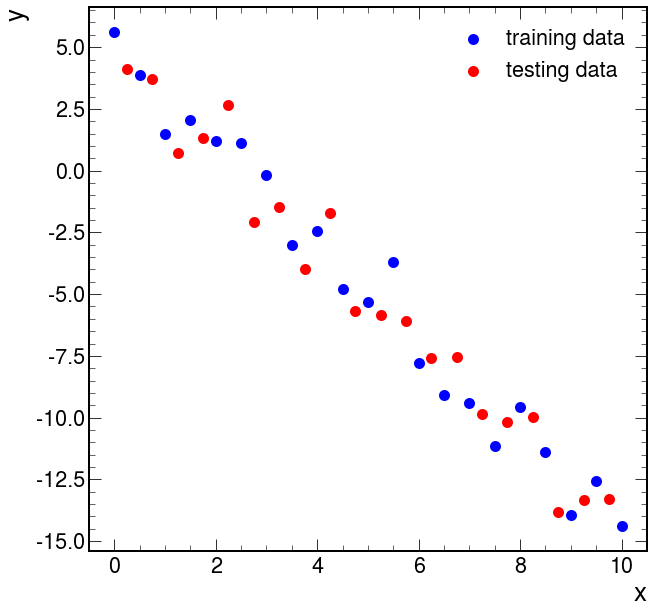

In [4]:
plt.style.use(hep.style.CMS)
plt.scatter(x, y,linewidths=5,color='blue', label='training data')
plt.scatter(x_test, y_test,linewidths=5,color='red', label='testing data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [5]:
def MSE(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [6]:
y_true = np.array([1, 2, 3])
y_pred = np.array([1.1, 1.9, 3])
print('MSE = ' + str(MSE(y_true, y_pred)))

MSE = 0.006666666666666678


In [7]:
def propagate(m, b, X, Y):
    
    ### INPUT ARGUMENTS
    ## m = slope of the line
    ## b = bias
    ## X = np.array
    ## Y = True value

    ### RETURNS
    ## cost = MSE
    ## dm = gradient of the loss with respect to m
    ## db = gradient of the loss with respect to b
    
    y_pred = m * X + b
    cost = MSE(Y, y_pred)
    
    dm = np.mean(-2 * (Y - y_pred) * X)
    db = np.mean(-2 * (Y - y_pred))
    
    assert(dm.dtype == float)
    assert(db.dtype == float)
    
    grads = {
        'dm' : dm,
        'db' : db
    }
    return grads, cost

In [8]:
m, b, X, Y = 1.0, 2.5, np.array([1, 2, 3, 4]), np.array([1.2, -2.3, 3.0, 4.5])
grads, cost = propagate(m, b, X, Y)
print('dm = ' + str(grads['dm']))
print('db = ' + str(grads['db']))
print('MSE = ' + str(cost))

dm = 15.7
db = 6.8
MSE = 15.444999999999999


In [9]:
def optimize(m, b, X, Y, num_iterations, learning_rate, print_cost=False):
    ### INPUT ARGUMENTS
    ## m = slope of the line
    ## b = bias
    ## X = np.array
    ## Y = True value
    ## num_iterations = number of iterations of the optimization loop
    ## learning_rate = learning rate of the gradient descent update rule
    ## print_cost = True to print the loss every 100 steps
    
    ### RETURNS
    ## params = dictionary containing the slope m and bias b
    ## grads = dictionary containing the gradients of the slope and bias with respect to the cost function
    ## costs = list of all the costs computed during the optimization, this will be used to plot the learning curve
    
    costs = []
    slopes = []
    biases = []
    
    for i in range(num_iterations):
        slopes.append(m)
        biases.append(b)
        
        grads, cost = propagate(m, b, X, Y)
        
        dm = grads['dm']
        db = grads['db']
        
        m = m - learning_rate * dm
        b = b - learning_rate * db
        
        costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print('Cost after iteration %i: %f' %(i, cost))
        
    params = {
        'm' : m,
        'b' : b
    }
    grads = {
        'dm' : dm,
        'db' : db
    }
        
    return params, grads, costs, slopes, biases

In [10]:
params, grads, costs, slopes, biases = optimize(0, 0, x, y, 10000, 1e-2, print_cost=False)

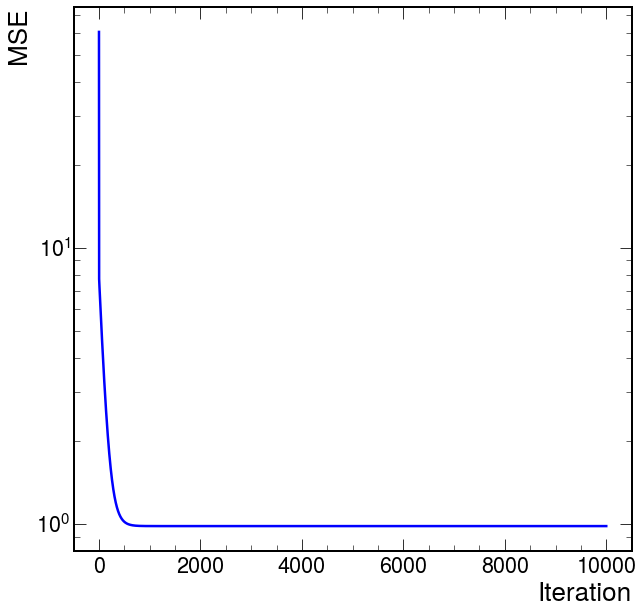

In [11]:
## Plotting MSE
plt.plot(costs,color ='blue',linewidth=2.5)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.yscale('log')
plt.minorticks_on()
plt.show()

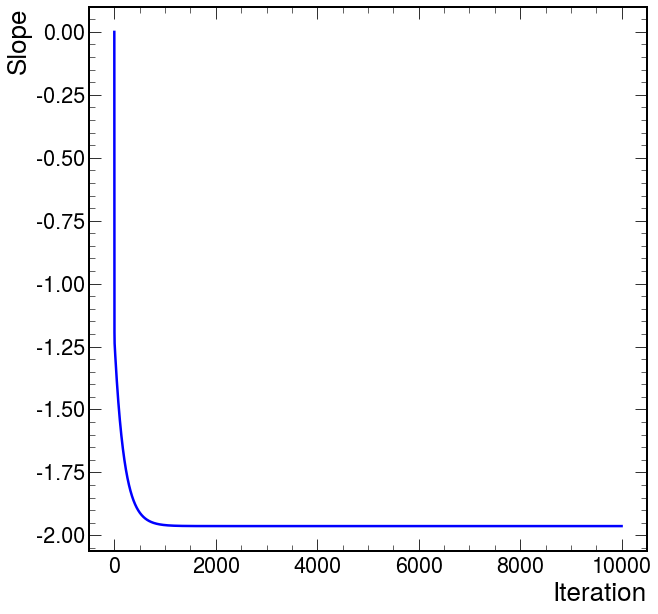

In [12]:
## Plotting slopes
plt.plot(slopes,color ='blue',linewidth=2.5)
plt.xlabel('Iteration')
plt.ylabel('Slope')
plt.minorticks_on()
plt.show()

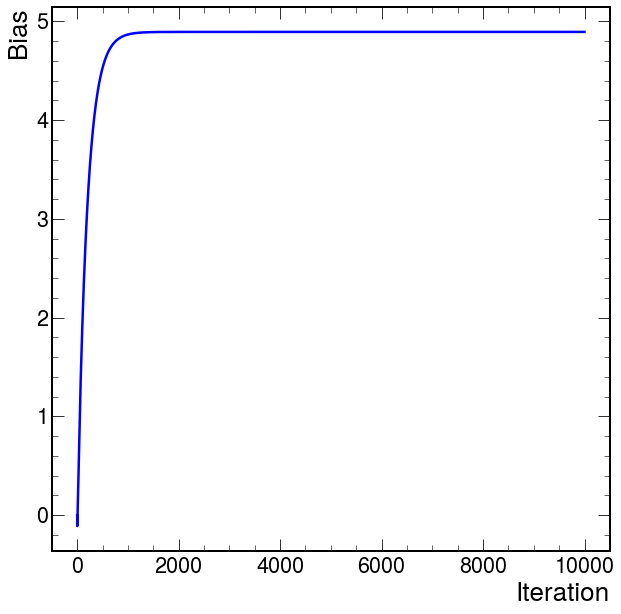

In [13]:
## Plotting biases
plt.plot(biases,color ='blue',linewidth=2.5)
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.minorticks_on()
plt.show()

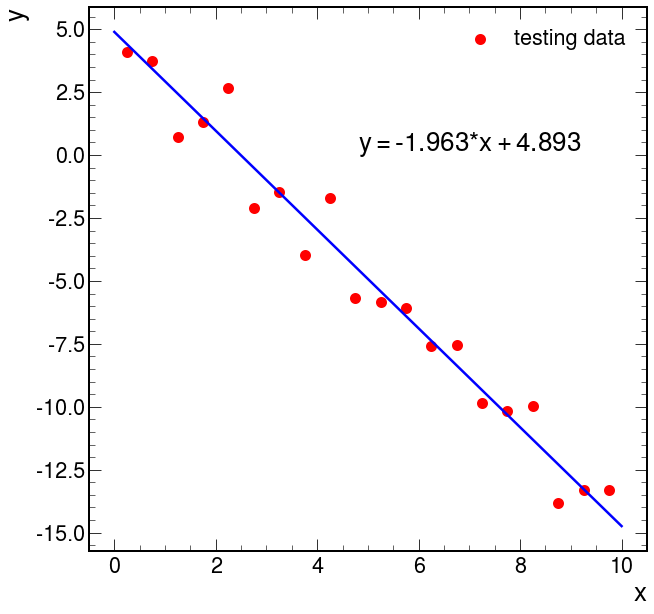

In [14]:
xrange = np.linspace(0, 10)
y_pred = xrange * params['m'] + params['b']
plt.plot(xrange, y_pred,linewidth=2.5,color='blue')
plt.scatter(x_test, y_test,linewidth=5, color='red', label='testing data')
plt.text(7., 1, r'$y=$' + '{0:.3f}'.format(params['m']) + r'$*x + $' + '{0:.3f}'.format(params['b']),
         ha='center', va='top')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()